## An exploratory analysis from a simulated dataset of customer purchase behavior

- Some points I am interested in exploring:

1) the customer profile (average age, gender, education, region, income and best selling product category)

2) the relationship between the audience age, gender, education, region, income and the product category

2) the connection between purchase frequency and region

3) the connection of loyalty status of the customer and the purchase amount

4) examine the degree of customer loyalty compared to their satisfaction score


### Column Descriptors:
- age: Age of the customer.
- gender: Gender of the customer (0 for Male, 1 for Female).
- income: Annual income of the customer.
- education: Education level of the customer.
- region: Region where the customer resides.
- loyalty_status: Loyalty status of the customer.
- purchase_frequency: Frequency of purchases made by the customer.
- purchase_amount: Amount spent by the customer in each purchase.
- product_category: Category of the purchased product.
- promotion_usage: Indicates whether the customer used promotional offers (0 for No, 1 for Yes).
- satisfaction_score: Satisfaction score of the customer.

access the dataset at: [customer purchases behaviour](https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset)


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [97]:
# reading the .csv file
data_customer = pd.read_csv('customer_data.csv')

In [98]:
data_customer.head(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Female,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,9,27,Male,19154,College,East,Regular,occasional,5819,Clothing,0,5
9,10,28,Female,24666,HighSchool,North,Regular,rare,8779,Food,0,6


In [99]:
data_customer.drop(columns='id',inplace=True)

In [100]:
data_customer.drop(columns='promotion_usage', inplace=True)

In [101]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   satisfaction_score  100000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


In [102]:
data_customer.shape

(100000, 10)

In [103]:
# checking if there is null data
data_customer.isna().sum()

age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
satisfaction_score    0
dtype: int64

In [104]:
data_customer.describe()

,age,income,purchase_amount,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,5.009650
std,4.480535,12996.782587,4799.339449,1.038714
min,12.000000,5000.000000,1118.000000,0.000000
25%,27.000000,16271.750000,5583.000000,4.000000
50%,30.000000,27584.500000,9452.000000,5.000000
75%,33.000000,38747.250000,13350.000000,6.000000
max,49.000000,50000.000000,26204.000000,10.000000


### The dataset is okay, so far, so let's dive into the analysis!

In [105]:
# I will start by listing the characteristics of the users and the main categories of products requested
data_customer['product_category'].value_counts()
product_category_counting = data_customer['product_category'].value_counts().reset_index()
product_category_counting.columns = ['product_category', 'counting']

In [106]:
product_category_counting

,product_category,counting
0,Electronics,30027
1,Clothing,19989
2,Books,14925
3,Food,14822
4,Health,10123
5,Home,5079
6,Beauty,5035


In [107]:
eletronic_percentage = 30027 / 100000
print(eletronic_percentage)

clothing_percentage = 19989 / 100000
print(clothing_percentage)

books_percentage = 14925 / 100000
print(books_percentage)

print(eletronic_percentage + clothing_percentage + books_percentage)

0.30027
0.19989
0.14925
0.6494099999999999


- The first three best-selling products (eletronics, clothing and books) satisfy around 65% of total sales


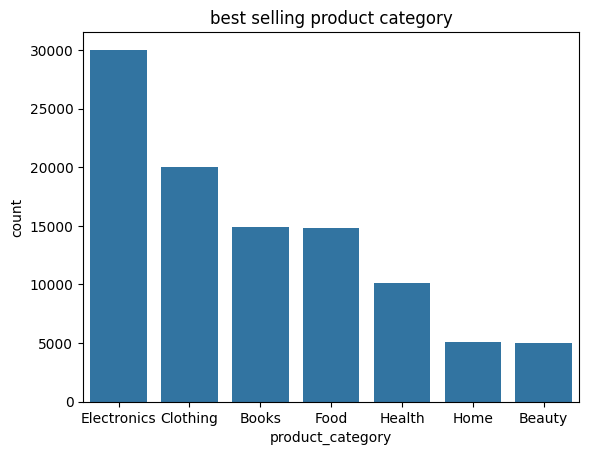

In [108]:
# Creating a graph
sns.barplot(x=product_category_counting['product_category'], y=product_category_counting['counting'])
plt.xlabel('product_category')
plt.ylabel('count')
plt.title('best selling product category')
plt.show()

- Okay, this is interesting, Electronics is the top selling product category, followed by Clothing, Books and Food. This gives us an initial observation, but we still need to investigate the profile of our target customer!

In [109]:
# starting with our customer average age 
data_customer['age'].mean()


np.float64(30.00326)

In [110]:
data_customer['age'].median()

np.float64(30.0)

In [111]:
data_customer['age'].value_counts()

age
30    8867
31    8645
29    8636
28    8266
32    8034
33    7214
27    7022
34    5894
26    5882
35    4873
25    4856
36    3583
24    3576
37    2697
23    2636
38    1791
22    1790
39    1200
21    1187
20     743
40     682
41     481
19     457
42     242
18     233
17     143
43     125
16      66
44      58
15      39
45      35
47      13
14      13
46      11
13       4
12       3
48       2
49       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Variable distribution age')

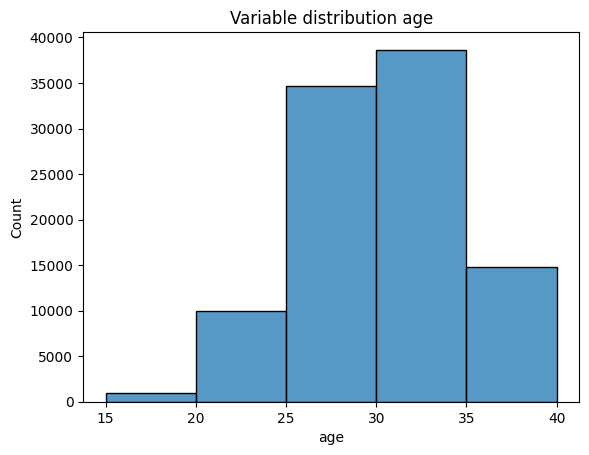

In [112]:
#Showing the plot
col = 'age'
sns.histplot(data=data_customer, x='age', bins=range(15, 45, 5), kde=False, ).set_title(f'Variable distribution {col}')

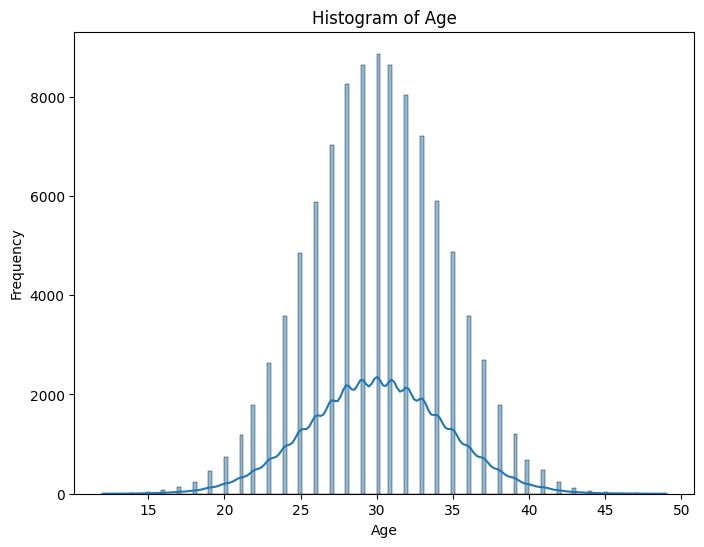

In [113]:
# Showing the histplot
plt.figure(figsize=(8, 6))
sns.histplot(data_customer['age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- So, we have that the average age of our customers is around 30 years
- Maybe if we investigate a little more we will be able to see some anomaly in consumer preference for the product category as age changes

In [114]:
df_age_30 = data_customer.loc[data_customer['age'] == 30, ['age']]

df_age_30.value_counts()

age
30     8867
Name: count, dtype: int64

In [115]:
df_electronics_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'electronics') & (data_customer['age'] == 30), ['product_category', 'age']]

df_electronics_age.value_counts()

product_category  age
Electronics       30     2666
Name: count, dtype: int64

In [116]:
df_books_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'books') & (data_customer['age'] == 30), ['product_category', 'age']]

df_books_age.value_counts()

product_category  age
Books             30     1335
Name: count, dtype: int64

In [117]:
df_clothing_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'clothing') & (data_customer['age'] == 30), ['product_category', 'age']]

df_clothing_age.value_counts()

product_category  age
Clothing          30     1797
Name: count, dtype: int64

In [118]:
df_health_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'health') & (data_customer['age'] == 30), ['product_category', 'age']]

df_health_age.value_counts()

product_category  age
Health            30     892
Name: count, dtype: int64

In [119]:
df_home_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'home') & (data_customer['age'] == 30), ['product_category', 'age']]

df_home_age.value_counts()

product_category  age
Home              30     438
Name: count, dtype: int64

In [120]:
df_beauty_age = data_customer.loc[(data_customer['product_category'].str.lower() == 'beauty') & (data_customer['age'] == 30), ['product_category', 'age']]

df_beauty_age.value_counts()

product_category  age
Beauty            30     446
Name: count, dtype: int64

- Okay so far it's understandable, the average age of our customer profile is compatible with the expected order of best-selling products
- Let's investigate a little bit more, and try to understand if the older customers have different preferences.

In [121]:
# First, let's isolate the total sales for each customer aged 30 to 40
data_customer_age_30_40 = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40), ['age']]
data_customer_age_30_40.value_counts()

age
30     8867
31     8645
32     8034
33     7214
34     5894
35     4873
36     3583
37     2697
38     1791
39     1200
40      682
Name: count, dtype: int64

In [122]:
# Now, let's create a comparison of the total products sold in each category and the total products in all categories, filtering from 30 - 40 years
df_age_35_40_electro = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Electronics'), ['age', 'product_category']]
proportion_electro = df_age_35_40_electro.value_counts() / data_customer_age_30_40.value_counts() 
proportion_electro


age  product_category
30   Electronics         0.300665
31   Electronics         0.296588
32   Electronics         0.304456
33   Electronics         0.303854
34   Electronics         0.295385
35   Electronics         0.288118
36   Electronics         0.297516
37   Electronics         0.300334
38   Electronics         0.292574
39   Electronics         0.301667
40   Electronics         0.324047
Name: count, dtype: float64

In [123]:
df_age_30_40_clothing = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Clothing'), ['age', 'product_category']]
proportion_clothing = df_age_30_40_clothing.value_counts() / data_customer_age_30_40.value_counts() 
proportion_clothing

age  product_category
30   Clothing            0.202662
31   Clothing            0.200231
32   Clothing            0.191312
33   Clothing            0.199889
34   Clothing            0.203936
35   Clothing            0.200903
36   Clothing            0.195925
37   Clothing            0.213200
38   Clothing            0.190955
39   Clothing            0.207500
40   Clothing            0.217009
Name: count, dtype: float64

In [124]:
df_age_30_40_books = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Books'), ['age', 'product_category']]
proportion_books = df_age_30_40_books.value_counts() / data_customer_age_30_40.value_counts() 
proportion_books

age  product_category
30   Books               0.150558
31   Books               0.152574
32   Books               0.149988
33   Books               0.147907
34   Books               0.153885
35   Books               0.156577
36   Books               0.145409
37   Books               0.139785
38   Books               0.152429
39   Books               0.142500
40   Books               0.117302
Name: count, dtype: float64

In [125]:
df_age_30_40_food = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Food'), ['age', 'product_category']]
proportion_food = df_age_30_40_food.value_counts() / data_customer_age_30_40.value_counts() 
proportion_food

age  product_category
30   Food                0.145822
31   Food                0.151764
32   Food                0.147374
33   Food                0.146382
34   Food                0.145232
35   Food                0.147548
36   Food                0.158526
37   Food                0.152021
38   Food                0.156337
39   Food                0.145000
40   Food                0.149560
Name: count, dtype: float64

In [126]:
df_age_30_40_health = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Health'), ['age', 'product_category']]
proportion_health = df_age_30_40_health.value_counts() / data_customer_age_30_40.value_counts() 
proportion_health

age  product_category
30   Health              0.100598
31   Health              0.096588
32   Health              0.102066
33   Health              0.102717
34   Health              0.098575
35   Health              0.106916
36   Health              0.101312
37   Health              0.095291
38   Health              0.100503
39   Health              0.105000
40   Health              0.090909
Name: count, dtype: float64

In [127]:
df_age_30_40_home = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Home'), ['age', 'product_category']]
proportion_home = df_age_30_40_home.value_counts() / data_customer_age_30_40.value_counts() 
proportion_home

age  product_category
30   Home                0.049397
31   Home                0.048699
32   Home                0.050909
33   Home                0.052537
34   Home                0.054123
35   Home                0.051714
36   Home                0.046051
37   Home                0.052280
38   Home                0.055835
39   Home                0.048333
40   Home                0.042522
Name: count, dtype: float64

In [128]:
df_age_30_40_beauty = data_customer.loc[(data_customer['age'] >= 30) & (data_customer['age'] <= 40) & (data_customer['product_category'] == 'Beauty'), ['age', 'product_category']]
proportion_beauty = df_age_30_40_beauty.value_counts() / data_customer_age_30_40.value_counts() 
proportion_beauty

age  product_category
30   Beauty              0.050299
31   Beauty              0.053557
32   Beauty              0.053896
33   Beauty              0.046715
34   Beauty              0.048863
35   Beauty              0.048225
36   Beauty              0.055261
37   Beauty              0.047089
38   Beauty              0.051368
39   Beauty              0.050000
40   Beauty              0.058651
Name: count, dtype: float64

- We did not find any considerable anomalies. Consumer preference from this dataset still indicates a relationship as expected

- Let's try with customers from age 20 to 30

In [129]:
# First, let's isolate the total sales for each customer aged 20 to 30
data_customer_age_20_30 = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30), ['age']]
data_customer_age_20_30.value_counts()

age
30     8867
29     8636
28     8266
27     7022
26     5882
25     4856
24     3576
23     2636
22     1790
21     1187
20      743
Name: count, dtype: int64

In [130]:
# Now, let's create a comparison of the total products sold in each product category and the total products in all categories, filtering from 20 - 30 years
df_age_20_30_electro = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'] == 'Electronics'), ['age', 'product_category']]
proportion_electro2 = df_age_20_30_electro.value_counts() / data_customer_age_20_30.value_counts() 
proportion_electro2

age  product_category
20   Electronics         0.355316
21   Electronics         0.288121
22   Electronics         0.300559
23   Electronics         0.311077
24   Electronics         0.301174
25   Electronics         0.293451
26   Electronics         0.299388
27   Electronics         0.300769
28   Electronics         0.299419
29   Electronics         0.305581
30   Electronics         0.300665
Name: count, dtype: float64

In [131]:
df_age_20_30_clothing = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'] == 'Clothing'), ['age', 'product_category']]
proportion_clothing2 = df_age_20_30_clothing.value_counts() / data_customer_age_20_30.value_counts() 
proportion_clothing2

age  product_category
20   Clothing            0.187079
21   Clothing            0.216512
22   Clothing            0.196089
23   Clothing            0.205615
24   Clothing            0.187640
25   Clothing            0.192545
26   Clothing            0.202992
27   Clothing            0.195244
28   Clothing            0.208323
29   Clothing            0.199166
30   Clothing            0.202662
Name: count, dtype: float64

In [132]:
df_age_20_30_books = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'].str.lower() == 'books'), ['age', 'product_category']]
proportion_books2 = df_age_20_30_books.value_counts() / data_customer_age_20_30.value_counts() 
proportion_books2

age  product_category
20   Books               0.119785
21   Books               0.155013
22   Books               0.159777
23   Books               0.143778
24   Books               0.150727
25   Books               0.156713
26   Books               0.142469
27   Books               0.140985
28   Books               0.147714
29   Books               0.153080
30   Books               0.150558
Name: count, dtype: float64

In [133]:
df_age_20_30_food = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'].str.lower() == 'food'), ['age', 'product_category']]
proportion_food2 = df_age_20_30_food.value_counts() / data_customer_age_20_30.value_counts() 
proportion_food2

age  product_category
20   Food                0.126514
21   Food                0.149958
22   Food                0.144693
23   Food                0.138847
24   Food                0.151007
25   Food                0.140651
26   Food                0.146209
27   Food                0.158502
28   Food                0.150012
29   Food                0.144975
30   Food                0.145822
Name: count, dtype: float64

In [134]:
df_age_20_30_health = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'].str.lower() == 'health'), ['age', 'product_category']]
proportion_health2 = df_age_20_30_health.value_counts() / data_customer_age_20_30.value_counts() 
proportion_health2

age  product_category
20   Health              0.098250
21   Health              0.101095
22   Health              0.096648
23   Health              0.105083
24   Health              0.101790
25   Health              0.111820
26   Health              0.103706
27   Health              0.100399
28   Health              0.099927
29   Health              0.098078
30   Health              0.100598
Name: count, dtype: float64

In [135]:
df_age_20_30_home = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'].str.lower() == 'home'), ['age', 'product_category']]
proportion_home2 = df_age_20_30_home.value_counts() / data_customer_age_20_30.value_counts() 
proportion_home2

age  product_category
20   Home                0.059219
21   Home                0.048863
22   Home                0.051397
23   Home                0.051214
24   Home                0.053412
25   Home                0.050453
26   Home                0.052023
27   Home                0.054258
28   Home                0.047302
29   Home                0.050486
30   Home                0.049397
Name: count, dtype: float64

In [136]:
df_age_20_30_beauty = data_customer.loc[(data_customer['age'] >= 20) & (data_customer['age'] <= 30) & (data_customer['product_category'].str.lower() == 'beauty'), ['age', 'product_category']]
proportion_beauty2 = df_age_20_30_beauty.value_counts() / data_customer_age_20_30.value_counts() 
proportion_beauty2

age  product_category
20   Beauty              0.053836
21   Beauty              0.040438
22   Beauty              0.050838
23   Beauty              0.044385
24   Beauty              0.054251
25   Beauty              0.054366
26   Beauty              0.053213
27   Beauty              0.049843
28   Beauty              0.047302
29   Beauty              0.048634
30   Beauty              0.050299
Name: count, dtype: float64

- In summary, there is no change in the type of best-selling product across different age groups; the order of the best-selling products remains the same for any range of age.



## So now, let's continue the analysis and find out the gender of our target audience according to this dataset.

In [77]:
# Setting the values for each gender
data_customer['gender'].value_counts()


gender
Female    50074
Male      49926
Name: count, dtype: int64

Text(0.5, 1.0, 'Variable distribution age')

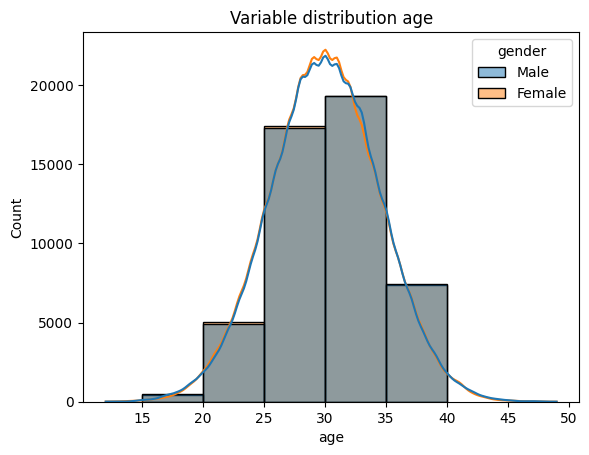

In [78]:
#Showing the plot
col = 'age'
sns.histplot(data=data_customer, x='age', bins=range(15, 45, 5), kde=True, hue='gender').set_title(f'Variable distribution {col}')

Text(0.5, 1.0, 'Variable distribution product_category')

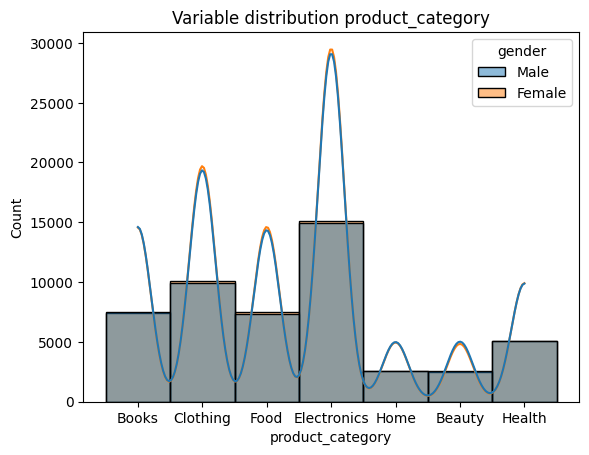

In [79]:
#Showing the plot
col = 'product_category'
sns.histplot(data=data_customer, x='product_category', kde=True, hue='gender').set_title(f'Variable distribution {col}')

- To sum up, the female audience consumes more of our products, although the difference compared to the male audience is minimal.
- It is worth noting that the distribution by age and product categories consumed is very balanced between the male and female audiences (almost the same, in statistical terms)

### Let's now investigate the aspects of the region of our target customer 

C:\Users\stiag\AppData\Local\Temp\ipykernel_11868\668641630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=data_customer, palette=['orange', 'green', 'blue', 'red'])


<Axes: xlabel='region', ylabel='count'>

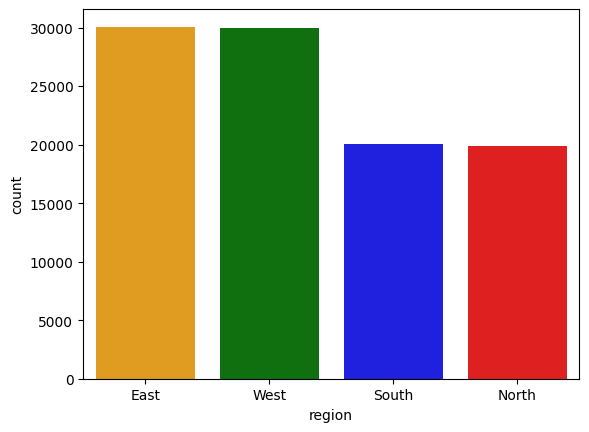

In [80]:
sns.countplot(x='region',data=data_customer, palette=['orange', 'green', 'blue', 'red'])

- The top-selling regions are: East and West

### Let's now investigate the aspects of the annual income of our target client

In [81]:
# let's take a quick look at the income column
data_customer['income'].describe()

count    100000.000000
mean      27516.269880
std       12996.782587
min        5000.000000
25%       16271.750000
50%       27584.500000
75%       38747.250000
max       50000.000000
Name: income, dtype: float64

In [82]:
data_customer['income'].median()

np.float64(27584.5)

In [83]:
data_customer['income'].mean()

np.float64(27516.26988)

- So far we can say that our target client has an annual income of around 27500 (even without information from the dataset, I'm assuming it's an income in dollars)

### I'm still interested in exploring product category preferences among higher-earning and lower-earning customers.
- For this purpose, I am selecting the value parameter of $38,747 annually which represents the earnings ceiling of about 75% of total customers. Maybe this can show us a different pattern of customer consumption.

Text(0.5, 1.0, 'Variable distribution income')

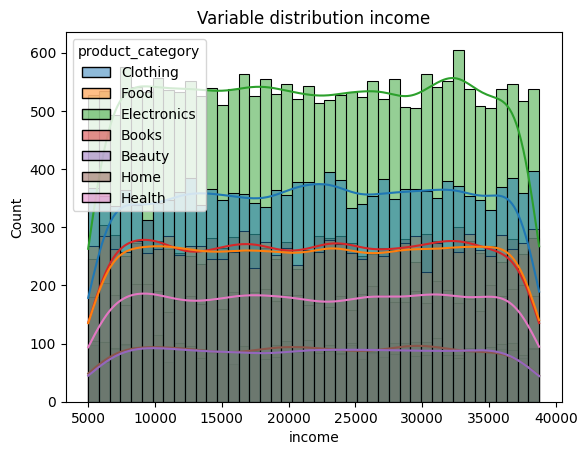

In [84]:
df_income_until_75 = data_customer.loc[(data_customer['income'] <= 38747), ['income', 'product_category']]
#Showing the plot
col = 'income'
sns.histplot(data=df_income_until_75, x='income', kde=True, hue='product_category').set_title(f'Variable distribution {col}')

Text(0.5, 1.0, 'Variable distribution income')

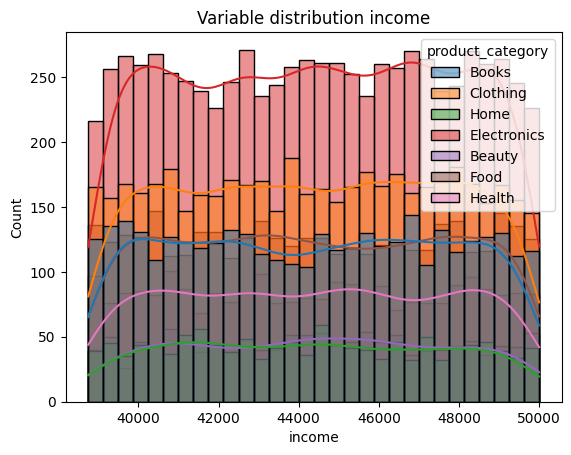

In [85]:
df_income_75_100 = data_customer.loc[(data_customer['income'] >= 38747), ['income', 'product_category']]
#Showing the plot
col = 'income'
sns.histplot(data=df_income_75_100, x='income', kde=True, hue='product_category').set_title(f'Variable distribution {col}')

- Conclusion: consumer behavior is the same considering the two ranges of annual earnings (above and below $38,747 dollars)

#### Income vs Purchase amount of our customers

<Axes: xlabel='income', ylabel='purchase_amount'>

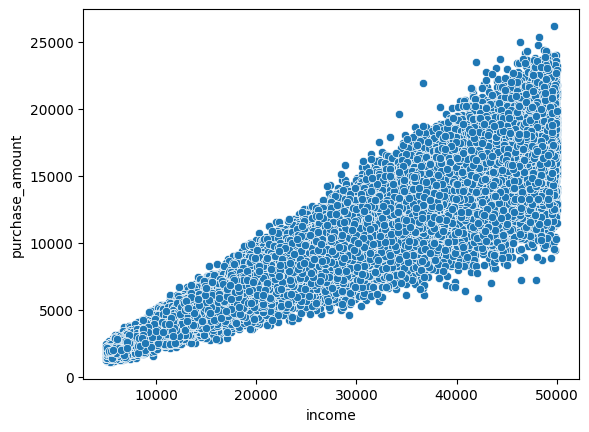

In [86]:
# Showing a plot
sns.scatterplot(x='income', y='purchase_amount', data=data_customer)

- Okay, there is an evidence that our customers with more annual income tend to spend more on each purchase
- This is interesting, because with this information we can start carry out Market Segmentation and offer products segmented by income range

#### The purchase frequency of our customers:

C:\Users\stiag\AppData\Local\Temp\ipykernel_11868\1809808175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase_frequency', data=data_customer, palette=['blue', 'red', 'purple'])


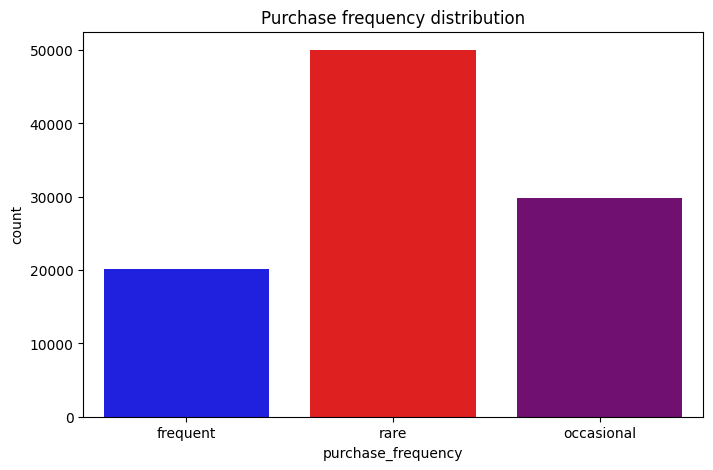

In [87]:
#Showing the plot
plt.figure(figsize=(8, 5))
sns.countplot(x='purchase_frequency', data=data_customer, palette=['blue', 'red', 'purple'])
plt.title("Purchase frequency distribution")
plt.show()

- Purchase frequency = rare

#### Purchase frequency vs Region

In [91]:
data_customer['region'].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [ ]:
# Purchase_frequency vs Region:
data_region_frequency = data_customer.groupby(['region', 'purchase_frequency'])['purchase_frequency'].size()

data_region_frequency

region  purchase_frequency
East    frequent               6067
        occasional             8947
        rare                  15060
North   frequent               3991
        occasional             5996
        rare                   9931
South   frequent               4052
        occasional             6025
        rare                   9996
West    frequent               5985
        occasional             8918
        rare                  15032
Name: purchase_frequency, dtype: int64

- The results showed that there is no variation in the distribution of purchase frequency between regions. In other words, regardless of whether they are regions with high or low sales volume, the order of consumption frequency remains the same

### Education Profile of our customers:

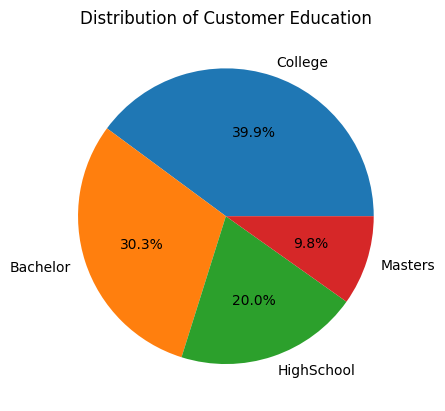

In [42]:
# Showing a customer education graph
x = data_customer['education'].value_counts() 
plt.pie(x.values, labels=x.index, autopct='%1.1f%%') 
plt.title("Distribution of Customer Education")
plt.show() 

### Loyalty status of our customers

C:\Users\stiag\AppData\Local\Temp\ipykernel_11868\742015099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_status', data=data_customer, palette=['yellow', 'green', 'silver'])


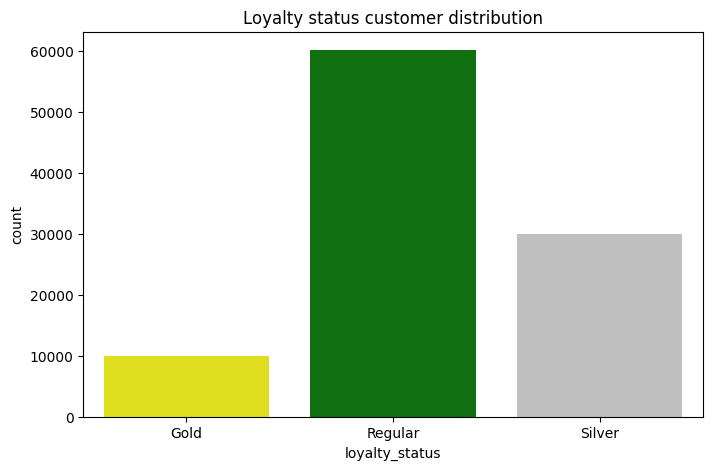

In [88]:
# Loyalty_Status
plt.figure(figsize=(8, 5))
sns.countplot(x='loyalty_status', data=data_customer, palette=['yellow', 'green', 'silver'])
plt.title("Loyalty status customer distribution")
plt.show()

- Loyalty status of most customers: Regular

Text(0.5, 1.0, 'Variable distribution purchase_amount')

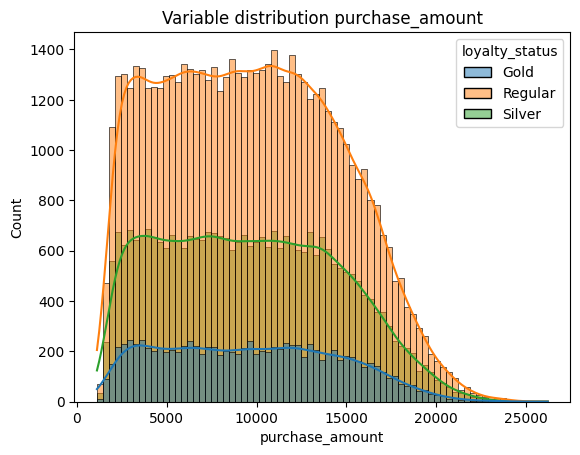

In [43]:
# Loyalty status vs purchase amount analysis
col = 'purchase_amount'
sns.histplot(data=data_customer, x='purchase_amount', kde=True, hue='loyalty_status').set_title(f'Variable distribution {col}')

- Customer spending aligns with the order of loyalty status.

#### Satisfaction score vs Loyalty_status

In [70]:

data_customer['satisfaction_score'].value_counts()


satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

C:\Users\stiag\AppData\Local\Temp\ipykernel_11108\3800906688.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#EB2813'` for the same effect.

  sns.countplot(x='satisfaction_score', hue='loyalty_status', data=data_customer, color='#EB2813')


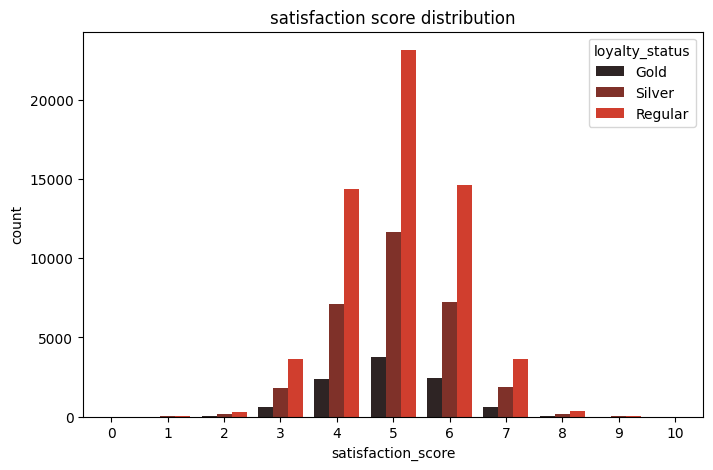

In [95]:
# satisfaction score graph
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction_score', hue='loyalty_status', data=data_customer, color='#EB2813')
plt.title("satisfaction score distribution")
plt.show()

- There is no variation in the distribution of satisfaction score and loyalty_status

# Conclusion

- Answering the questions:

1) The customer profile (average age, gender, education, region, income, best selling product category)
    - Average age of our customers: 30 years;
    - Gender: our consumers are well divided between men and women;
    - Education: 1st College, 2nd Bachelor, 3rd Highschool, 4th Masters, in this order;
    - Region: East and West are the regions in which our consumers purchased the most, followed by South and North;
    - Income: our consumer has an average annual income of around $27.500 (I'm investing dollars even though the dataset does not give us this information)
    - Best selling product category: the best-selling product category is electronics, followed by clothing, books, food, health, home and beauty.

2) The relationship between the audience age, gender, education, region, income and the product category
    - No differences in consumption patterns by product category were observed concerning age, gender, education, region, or annual income of consumers. In other words, purchasing behavior remains consistent regardless of these factors.

2) The connection between purchase frequency and region
    - The results showed that there is no variation in the distribution of purchase frequency between regions. In other words, regardless of whether they are regions with high or low sales volume, the order of consumption frequency remains the same.

3) The connection of loyalty status of the customer and the purchase amount
    - Customer spending aligns with the order of loyalty status.

4) Examine the degree of customer loyalty compared to their satisfaction score
    - There is no variation in the distribution of satisfaction ratings across customer loyalty statuses